## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x  = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer" + str(i + 1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer" + str( i+ 1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.5, 0.6, 0.7]
redice_lr_patient = [5, 10, 15]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1) 
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 3s 56us/step - loss: 1.2707 - acc: 0.5582 - val_loss: 1.4957 - val_acc: 0.4767
Epoch 14/25
50000/50000 [==============================] - 3s 55us/step - loss: 1.2490 - acc: 0.5662 - val_loss: 1.4657 - val_acc: 0.4857
Epoch 15/25
50000/50000 [==============================] - 3s 54us/step - loss: 1.2275 - acc: 0.5736 - val_loss: 1.4655 - val_acc: 0.4864
Epoch 16/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.2080 - acc: 0.5817 - val_loss: 1.4642 - val_acc: 0.4920
Epoch 17/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.1875 - acc: 0.5900 - val_loss: 1.4559 - val_acc: 0.4871
Epoch 18/25
50000/50000 [==============================] - 3s 54us/step - loss: 1.1701 - acc: 0.5968 - val_loss: 1.4644 - val_acc: 0.4876
Epoch 19/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.1511 - acc: 0.6030 - val_loss: 1.4538 - val_acc: 0.4955
Epoch 20/25
50000/50000 [=====================

50000/50000 [==============================] - 4s 81us/step - loss: 2.2425 - acc: 0.2632 - val_loss: 2.1265 - val_acc: 0.3041
Epoch 2/25
50000/50000 [==============================] - 3s 55us/step - loss: 1.7670 - acc: 0.3814 - val_loss: 1.8748 - val_acc: 0.3595
Epoch 3/25
50000/50000 [==============================] - 3s 57us/step - loss: 1.6429 - acc: 0.4238 - val_loss: 1.8029 - val_acc: 0.3888
Epoch 4/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.5718 - acc: 0.4499 - val_loss: 1.6607 - val_acc: 0.4186
Epoch 5/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.5185 - acc: 0.4689 - val_loss: 1.6269 - val_acc: 0.4290
Epoch 6/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.4769 - acc: 0.4831 - val_loss: 1.5876 - val_acc: 0.4427
Epoch 7/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.4400 - acc: 0.4966 - val_loss: 1.5791 - val_acc: 0.4446
Epoch 8/25
50000/50000 [============================

50000/50000 [==============================] - 3s 56us/step - loss: 1.1847 - acc: 0.5882 - val_loss: 1.4611 - val_acc: 0.4789
Epoch 25/25
50000/50000 [==============================] - 3s 57us/step - loss: 1.1735 - acc: 0.5938 - val_loss: 1.4660 - val_acc: 0.4870
Numbers of exp: 5, reduce_factor: 0.60, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.3777 - acc: 0.5202 - val_loss: 1.5250 - val_acc: 0.4705
Epoch 13/25
50000/50000 [==============================] - 3s 54us/step - loss: 1.3591 - acc: 0.5276 - val_loss: 1.5183 - val_acc: 0.4701
Epoch 14/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.3386 - acc: 0.5352 - val_loss: 1.5046 - val_acc: 0.4723
Epoch 15/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.3214 - acc: 0.5414 - val_loss: 1.4993 - val_acc: 0.4782
Epoch 16/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.3043 - acc: 0.5455 - val_loss: 1.4943 - val_acc: 0.4781
Epoch 17/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.2893 - acc: 0.5520 - val_loss: 1.4844 - val_acc: 0.4826
Epoch 18/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.2738 - acc: 0.5587 - val_loss: 1.4773 - val_acc: 0.4834
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 82us/step - loss: 2.3555 - acc: 0.2330 - val_loss: 2.2446 - val_acc: 0.2900
Epoch 2/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.8690 - acc: 0.3561 - val_loss: 1.9534 - val_acc: 0.3362
Epoch 3/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.7285 - acc: 0.3980 - val_loss: 1.8073 - val_acc: 0.3735
Epoch 4/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.6503 - acc: 0.4251 - val_loss: 1.7409 - val_acc: 0.3963
Epoch 5/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.5937 - acc: 0.4450 - val_loss: 1.6853 - val_acc: 0.4094
Epoch 6/25
50000/50000 [==============================] - 3s 54us/step - loss: 1.5493 - acc: 0.4599 - val_loss: 1.6688 - val_acc: 0.4168
Epoch 7/25
50000/50000 [==============================] - 3s 52us/step - loss: 1.5113 - acc: 0.4715 - val_loss: 1.6249 - val_acc

50000/50000 [==============================] - 3s 55us/step - loss: 0.4144 - acc: 0.8793 - val_loss: 1.5579 - val_acc: 0.5259
Epoch 24/25
50000/50000 [==============================] - 3s 54us/step - loss: 0.3973 - acc: 0.8858 - val_loss: 1.5521 - val_acc: 0.5227

Epoch 00024: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 25/25
50000/50000 [==============================] - 3s 55us/step - loss: 0.3575 - acc: 0.9052 - val_loss: 1.5874 - val_acc: 0.5218
Numbers of exp: 10, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)               1024  

50000/50000 [==============================] - 3s 53us/step - loss: 1.1854 - acc: 0.5907 - val_loss: 1.4554 - val_acc: 0.4810
Epoch 10/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.1565 - acc: 0.6031 - val_loss: 1.4860 - val_acc: 0.4700
Epoch 11/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.1316 - acc: 0.6121 - val_loss: 1.4311 - val_acc: 0.4958
Epoch 12/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.1080 - acc: 0.6196 - val_loss: 1.4493 - val_acc: 0.4921
Epoch 13/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.0836 - acc: 0.6277 - val_loss: 1.4507 - val_acc: 0.4843
Epoch 14/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.0633 - acc: 0.6358 - val_loss: 1.4318 - val_acc: 0.4980
Epoch 15/25
50000/50000 [==============================] - 3s 53us/step - loss: 1.0425 - acc: 0.6437 - val_loss: 1.4312 - val_acc: 0.4958
Epoch 16/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 5s 98us/step - loss: 1.8843 - acc: 0.3544 - val_loss: 1.8680 - val_acc: 0.3657
Epoch 2/25
50000/50000 [==============================] - 3s 55us/step - loss: 1.5420 - acc: 0.4602 - val_loss: 1.6860 - val_acc: 0.4162
Epoch 3/25
50000/50000 [==============================] - 3s 69us/step - loss: 1.4459 - acc: 0.4939 - val_loss: 1.5995 - val_acc: 0.4296
Epoch 4/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.3820 - acc: 0.5143 - val_loss: 1.5706 - val_acc: 0.4395
Epoch 5/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.3319 - acc: 0.5363 - val_loss: 1.5775 - val_acc: 0.4427
Epoch 6/25
50000/50000 [==============================] - 3s 68us/step - loss: 1.2886 - acc: 0.5516 - val_loss: 1.5050 - val_acc: 0.4650
Epoch 7/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.2517 - acc: 0.5678 - val_loss: 1.4876 - val_acc

50000/50000 [==============================] - 3s 56us/step - loss: 0.8825 - acc: 0.7073 - val_loss: 1.4305 - val_acc: 0.4987
Epoch 25/25
50000/50000 [==============================] - 3s 52us/step - loss: 0.8676 - acc: 0.7152 - val_loss: 1.4259 - val_acc: 0.4956
Numbers of exp: 15, reduce_factor: 0.70, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

50000/50000 [==============================] - 4s 81us/step - loss: 1.2956 - acc: 0.5521 - val_loss: 1.4942 - val_acc: 0.4753
Epoch 11/25
50000/50000 [==============================] - 4s 82us/step - loss: 1.2726 - acc: 0.5605 - val_loss: 1.4848 - val_acc: 0.4767
Epoch 12/25
50000/50000 [==============================] - 4s 81us/step - loss: 1.2540 - acc: 0.5670 - val_loss: 1.4800 - val_acc: 0.4786
Epoch 13/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.2367 - acc: 0.5738 - val_loss: 1.4776 - val_acc: 0.4825
Epoch 14/25
50000/50000 [==============================] - 3s 69us/step - loss: 1.2190 - acc: 0.5817 - val_loss: 1.4725 - val_acc: 0.4841
Epoch 15/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.2044 - acc: 0.5857 - val_loss: 1.4728 - val_acc: 0.4810
Epoch 16/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.1885 - acc: 0.5905 - val_loss: 1.4657 - val_acc: 0.4832
Epoch 17/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.8430 - acc: 0.3695 - val_loss: 2.0834 - val_acc: 0.3119
Epoch 2/25
50000/50000 [==============================] - 3s 60us/step - loss: 1.5365 - acc: 0.4540 - val_loss: 2.2623 - val_acc: 0.2768
Epoch 3/25
50000/50000 [==============================] - 4s 75us/step - loss: 1.4224 - acc: 0.4978 - val_loss: 2.8080 - val_acc: 0.2807
Epoch 4/25
50000/50000 [==============================] - 3s 67us/step - loss: 1.3455 - acc: 0.5241 - val_loss: 1.6785 - val_acc: 0.4245
Epoch 5/25
50000/50000 [==============================] - 4s 76us/step - loss: 1.2790 - acc: 0.5460 - val_loss: 3.0241 - val_acc: 0.2304
Epoch 6/25
50000/50000 [==============================] - 3s 59us/step - loss: 1.2229 - acc: 0.5686 - val_loss: 2.1011 - val_acc: 0.3449
Epoch 7/25
50000/50000 [==============================] - 3s 60us/step - loss: 1.1744 - acc: 0.5846 - val_loss: 1.8283 - val_ac

50000/50000 [==============================] - 3s 58us/step - loss: 0.7158 - acc: 0.7613 - val_loss: 1.6579 - val_acc: 0.4708

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 24/25
50000/50000 [==============================] - 3s 58us/step - loss: 0.6260 - acc: 0.8056 - val_loss: 1.4665 - val_acc: 0.5136
Epoch 25/25
50000/50000 [==============================] - 3s 60us/step - loss: 0.6037 - acc: 0.8132 - val_loss: 1.5405 - val_acc: 0.4935
Numbers of exp: 20, reduce_factor: 0.50, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_61 (Batc (None, 256)               1024  

50000/50000 [==============================] - 3s 63us/step - loss: 1.1925 - acc: 0.5876 - val_loss: 1.6150 - val_acc: 0.4503
Epoch 11/25
50000/50000 [==============================] - 3s 63us/step - loss: 1.1621 - acc: 0.5975 - val_loss: 1.5070 - val_acc: 0.4661
Epoch 12/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.1316 - acc: 0.6085 - val_loss: 1.6234 - val_acc: 0.4340
Epoch 13/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.1039 - acc: 0.6185 - val_loss: 1.4977 - val_acc: 0.4800
Epoch 14/25
50000/50000 [==============================] - 3s 65us/step - loss: 1.0769 - acc: 0.6310 - val_loss: 1.6151 - val_acc: 0.4496
Epoch 15/25
50000/50000 [==============================] - 4s 71us/step - loss: 1.0500 - acc: 0.6375 - val_loss: 1.5134 - val_acc: 0.4745
Epoch 16/25
50000/50000 [==============================] - 3s 64us/step - loss: 1.0269 - acc: 0.6486 - val_loss: 1.6439 - val_acc: 0.4352
Epoch 17/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 121us/step - loss: 2.0651 - acc: 0.3078 - val_loss: 2.0289 - val_acc: 0.3353
Epoch 2/25
50000/50000 [==============================] - 3s 62us/step - loss: 1.7352 - acc: 0.3999 - val_loss: 1.8372 - val_acc: 0.3762
Epoch 3/25
50000/50000 [==============================] - 3s 55us/step - loss: 1.6070 - acc: 0.4379 - val_loss: 1.7586 - val_acc: 0.3932
Epoch 4/25
50000/50000 [==============================] - 3s 59us/step - loss: 1.5257 - acc: 0.4664 - val_loss: 1.7167 - val_acc: 0.4076
Epoch 5/25
50000/50000 [==============================] - 3s 55us/step - loss: 1.4671 - acc: 0.4889 - val_loss: 1.6250 - val_acc: 0.4307
Epoch 6/25
50000/50000 [==============================] - 3s 54us/step - loss: 1.4176 - acc: 0.5048 - val_loss: 1.6253 - val_acc: 0.4325
Epoch 7/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.3729 - acc: 0.5210 - val_loss: 1.5783 - val_ac

50000/50000 [==============================] - 3s 58us/step - loss: 0.9701 - acc: 0.6748 - val_loss: 1.4788 - val_acc: 0.4886
Epoch 25/25
50000/50000 [==============================] - 3s 54us/step - loss: 0.9515 - acc: 0.6807 - val_loss: 1.5196 - val_acc: 0.4842
Numbers of exp: 25, reduce_factor: 0.70, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_76 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizat

Epoch 12/25
50000/50000 [==============================] - 3s 57us/step - loss: 1.2186 - acc: 0.5799 - val_loss: 1.5149 - val_acc: 0.4679
Epoch 13/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.1919 - acc: 0.5905 - val_loss: 1.5321 - val_acc: 0.4690
Epoch 14/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.1668 - acc: 0.5975 - val_loss: 1.5168 - val_acc: 0.4700
Epoch 15/25
50000/50000 [==============================] - 3s 55us/step - loss: 1.1447 - acc: 0.6076 - val_loss: 1.5080 - val_acc: 0.4724
Epoch 16/25
50000/50000 [==============================] - 3s 55us/step - loss: 1.1211 - acc: 0.6173 - val_loss: 1.5002 - val_acc: 0.4767
Epoch 17/25
50000/50000 [==============================] - 3s 56us/step - loss: 1.0996 - acc: 0.6262 - val_loss: 1.5167 - val_acc: 0.4728
Epoch 18/25
50000/50000 [==============================] - 3s 62us/step - loss: 1.0802 - acc: 0.6304 - val_loss: 1.4932 - val_acc: 0.4782
Epoch 19/25
50000/50000 [=========

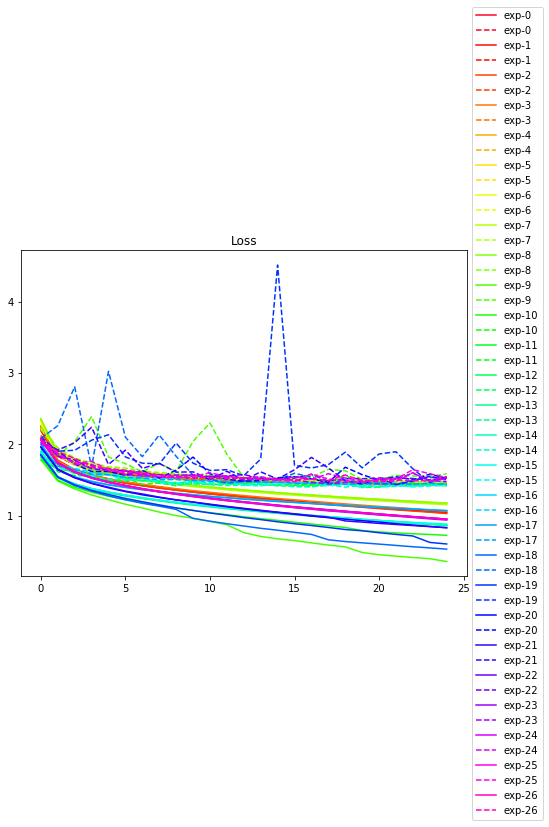

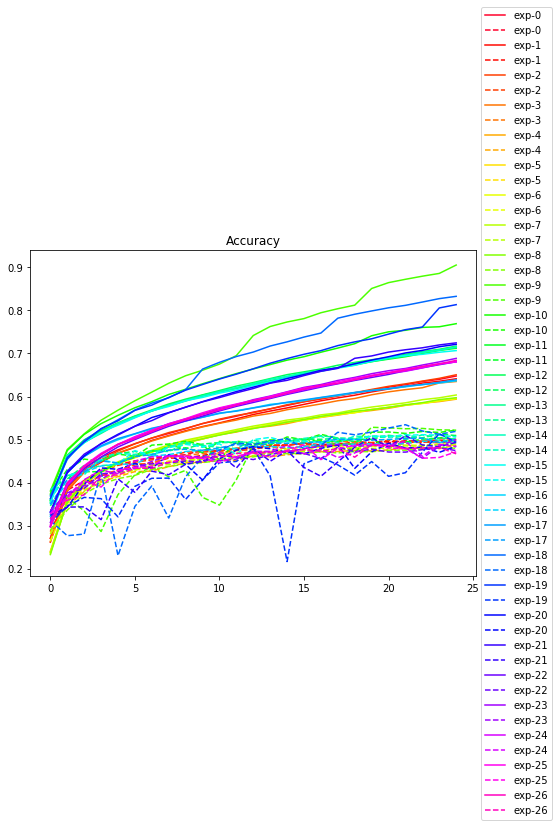

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()